In [ ]:
import os
import cv2
import numpy as np

# Define the path to the dataset folder
data_path = 'asl_alphabet_train'

# Define the target image size
img_size = (224, 224)

# Define the function for preprocessing images
def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path)
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize to target size
    img = cv2.resize(img, img_size)
    # Convert to float32 and normalize to [0, 1] range
    img = img.astype(np.float32) / 255.0
    # Add channel dimension for compatibility with deep learning models
    img = np.expand_dims(img, axis=-1)
    return img

# Iterate over all subfolders (each representing a different sign language letter)
for subdir in os.listdir(data_path):
    # Iterate over all image files in the subfolder
    i=1;
    for file in os.listdir(os.path.join(data_path, subdir)):
        # Preprocess the image and save it to a new file
        img_path = os.path.join(data_path, subdir, file)
        img = preprocess_image(img_path)
        save_path = os.path.join('asl_alphabet_train_processed', subdir, file)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        np.save(save_path, img)
        i+=1
        if(i==1000):
            break


In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the path to the preprocessed dataset folder
data_path = 'asl_alphabet_train_processed'

# Define the batch size and number of epochs for training
batch_size = 32
epochs = 10

# Load the preprocessed image data and labels
X = []
y = []
for subdir in os.listdir(data_path):
    label = ord(subdir) - ord('A')
    img_paths = [os.path.join(data_path, subdir, file) for file in os.listdir(os.path.join(data_path, subdir))]
    imgs = [np.load(img_path) for img_path in img_paths]
    X.extend(imgs)
    y.extend([label] * len(imgs))
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))



Epoch 1/10
650/650 [==============================] - 2893s 4s/step - loss: 2.3473 - accuracy: 0.2895 - val_loss: 0.9034 - val_accuracy: 0.7259
Epoch 2/10
650/650 [==============================] - 2077s 3s/step - loss: 0.8687 - accuracy: 0.7091 - val_loss: 0.3383 - val_accuracy: 0.9005
Epoch 3/10
650/650 [==============================] - 1538s 2s/step - loss: 0.4907 - accuracy: 0.8310 - val_loss: 0.2391 - val_accuracy: 0.9245
Epoch 4/10
650/650 [==============================] - 1532s 2s/step - loss: 0.3358 - accuracy: 0.8844 - val_loss: 0.1199 - val_accuracy: 0.9655
Epoch 5/10
650/650 [==============================] - 1607s 2s/step - loss: 0.2520 - accuracy: 0.9114 - val_loss: 0.1084 - val_accuracy: 0.9671
Epoch 6/10
650/650 [==============================] - 1676s 3s/step - loss: 0.2113 - accuracy: 0.9275 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 7/10
650/650 [==============================] - 1549s 2s/step - loss: 0.1786 - accuracy: 0.9370 - val_loss: 0.0581 - val_accuracy:

In [ ]:
from tensorflow.keras.models import load_model

# save the model
model.save('model.h5')


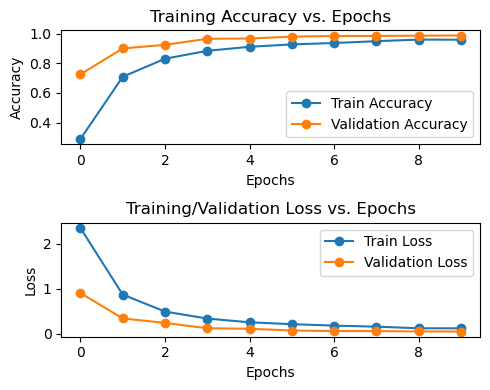

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define the accuracies and losses
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 4))

# Plot the Accuracy
ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

# Plot the Loss
ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
import os

# Define the path to the dataset directory
data_dir = 'asl_alphabet_train_processed'

# Loop over the files in the directory
for file_name in os.listdir(data_dir):
    # Check if the file is a .DS_Store file
    if file_name == '.DS_Store':
        # Delete the file
        os.remove(os.path.join(data_dir, file_name))
